# 1. Problem statement

# 2. import libraries

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_absolute_error

In [6]:
data = pd.read_csv("energydata_complete.csv")

In [7]:
print(data.head())


print(data.info())
print(data.describe())


                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

# 3. EDA

In [8]:
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month

# Interaction feature between temperature and humidity
data['temp_hum'] = data['T1'] * data['RH_1']

# Drop the 'date' column as it's no longer needed
data = data.drop(['date'], axis=1)


In [9]:
print(data.isnull().sum())
data = data.dropna(subset=['Appliances'])
data['Appliances'].fillna(data['Appliances'].median(), inplace=True)


Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
hour           0
day            0
month          0
temp_hum       0
dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_18900\4167772017.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Appliances'].fillna(data['Appliances'].median(), inplace=True)


### 2.Visualize Distributions

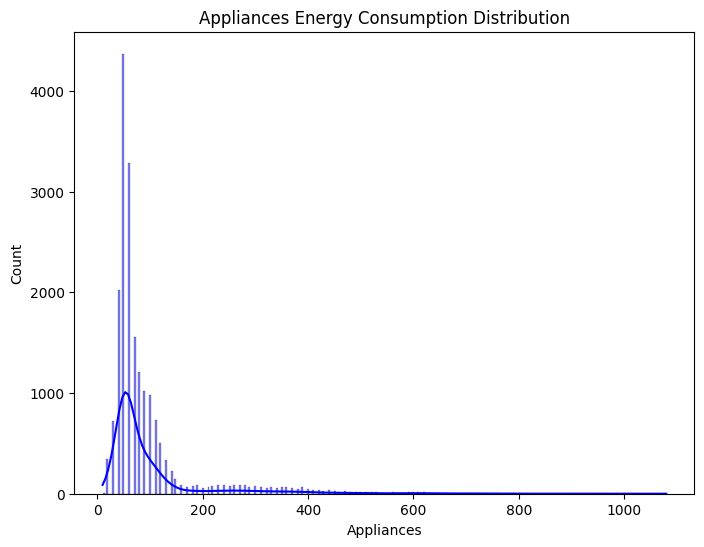

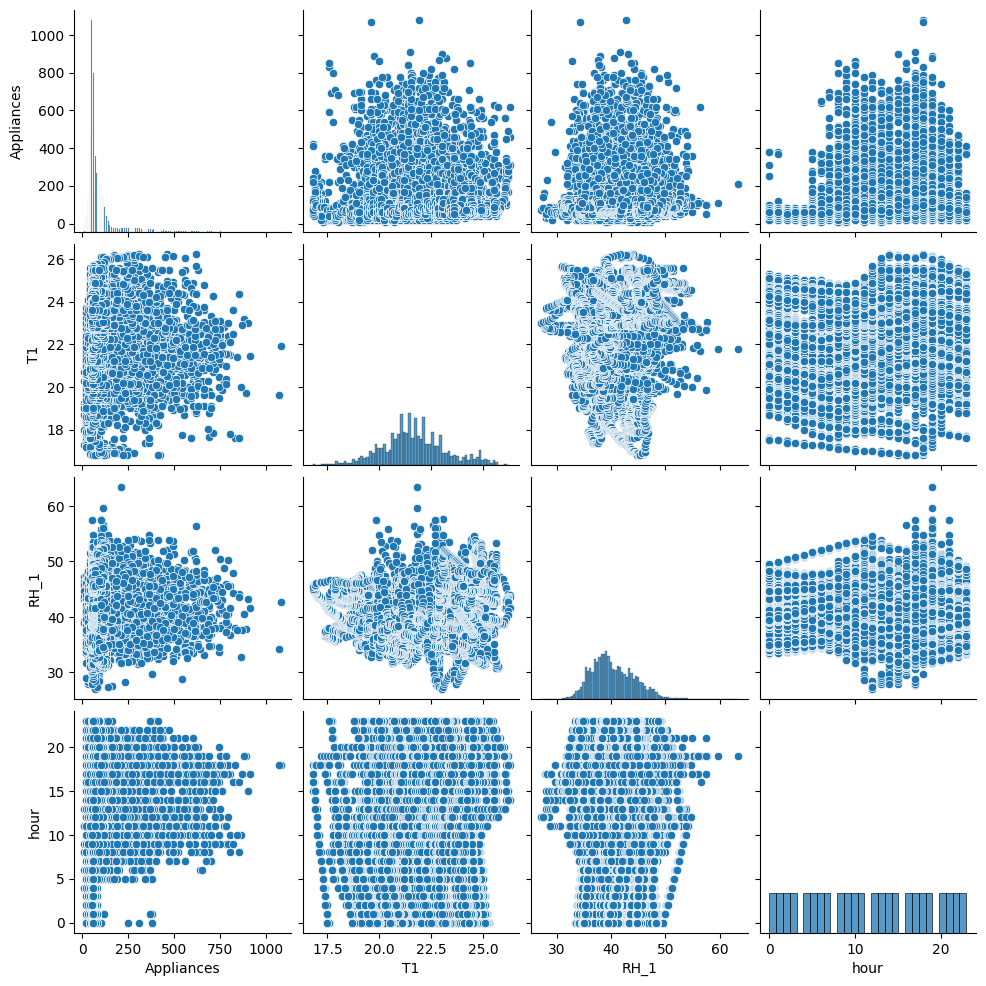

In [10]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['Appliances'], kde=True, color='blue')
plt.title("Appliances Energy Consumption Distribution")
plt.show()

# Pair plot to see relationships
sns.pairplot(data[['Appliances', 'T1', 'RH_1', 'hour']])
plt.show()


### 3. Correlation Heatmap

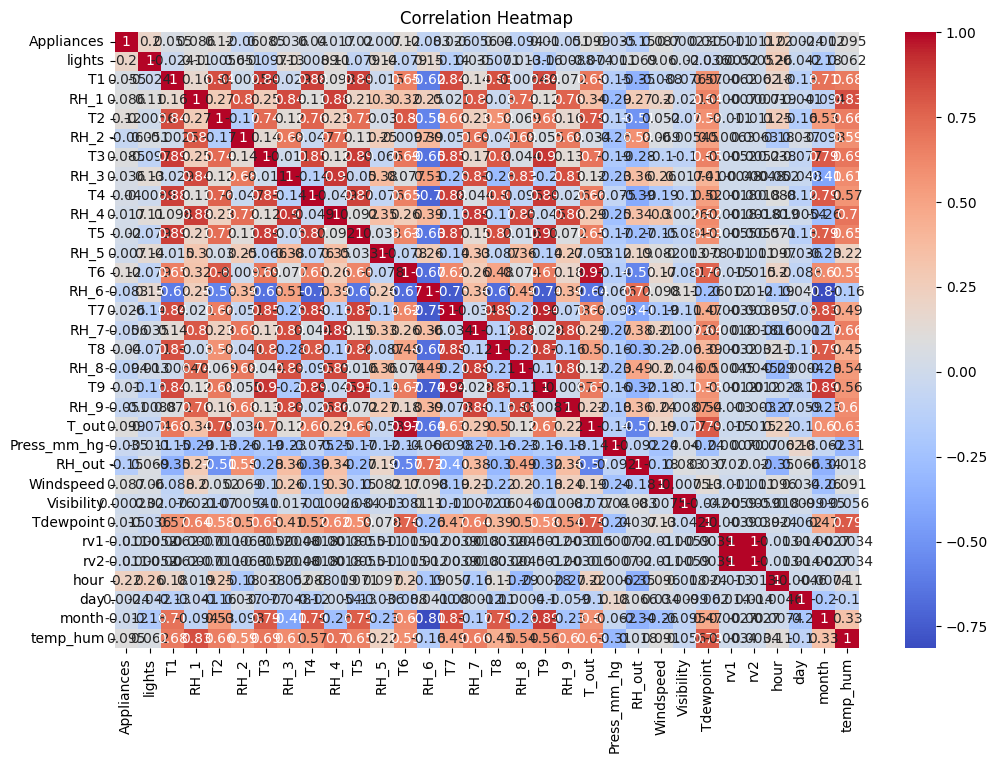

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 4. Data Cleaning

### Handle Outliers

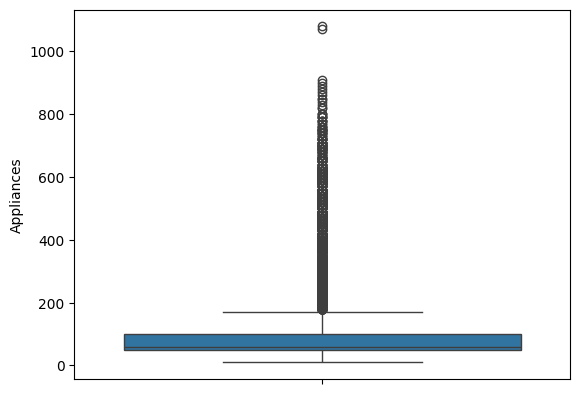

In [12]:
# Boxplot to identify outliers
sns.boxplot(data['Appliances'])
plt.show()

# Remove outliers if necessary
Q1 = data['Appliances'].quantile(0.25)
Q3 = data['Appliances'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Appliances'] >= lower_bound) & (data['Appliances'] <= upper_bound)]

# 5 feature engineering

In [13]:
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)


In [14]:
# data.drop(['date', 'timestamp'], axis=1, inplace=True) 

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['Appliances'], axis=1))
scaled_data = pd.DataFrame(scaled_features, columns=data.columns.drop('Appliances'))
scaled_data['Appliances'] = data['Appliances']


# train test split

In [16]:
scaled_data['Appliances'].fillna(scaled_data['Appliances'].median(), inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_18900\2931418469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scaled_data['Appliances'].fillna(scaled_data['Appliances'].median(), inplace=True)


In [17]:
X = scaled_data.drop(['Appliances'], axis=1)
y = scaled_data['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Visibility,Tdewpoint,rv1,rv2,hour,day,month,temp_hum,hour_sin,hour_cos
14624,-0.455098,0.818385,-1.413331,0.143195,-1.125858,0.591841,-0.763805,0.928553,-1.407564,0.756532,...,0.141226,-0.491905,0.087960,0.087960,-1.430126,-1.304596,1.401651,-0.646318,0.320335,1.285078
5049,2.201515,0.375680,0.793970,0.293810,0.702718,-0.115124,0.943754,0.069006,1.715842,-0.438712,...,-0.527520,1.410568,-1.502273,-1.502273,1.514061,0.466675,-0.838911,0.788963,-0.759976,1.144143
7386,-0.455098,-1.120785,-0.825227,-1.567352,0.028902,-0.984844,-0.580631,-0.321697,-0.799078,-0.990841,...,2.231056,-1.216277,1.608190,1.608190,-1.009528,-0.714172,-0.092057,-1.170665,1.184799,0.627770
11514,-0.455098,0.194857,-0.239668,-0.317868,0.474556,0.495205,0.195532,0.181334,-0.174397,0.424477,...,-0.945486,0.224508,-1.272461,-1.272461,-1.009528,-0.596087,0.654797,-0.077720,1.184799,0.627770
7765,-0.455098,-0.366317,-1.107822,-1.089382,-0.387205,-1.030619,-0.856945,-0.565886,-0.944837,-0.568060,...,0.977158,-1.152596,-1.412644,-1.412644,-1.430126,-0.359918,-0.092057,-0.990054,0.320335,1.285078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.455098,-0.428670,0.149855,0.015634,0.277582,-0.064264,-0.350887,-0.261463,0.003753,0.212179,...,-0.694706,0.144906,-0.641838,-0.641838,-0.168332,-0.832257,0.654797,-0.137873,0.663698,-1.299359
11964,-0.455098,0.257210,0.419722,1.111430,-0.414289,0.444344,-0.114933,1.219952,0.024576,0.464396,...,0.141226,0.797637,-1.545921,-1.545921,0.252266,-0.241833,0.654797,0.442628,-0.416613,-1.440294
5390,3.529821,-0.116906,1.007826,-0.230266,0.923493,-0.522011,0.647259,0.454826,-0.019383,-0.549915,...,0.141226,-0.173499,0.853006,0.853006,0.392466,0.820930,-0.838911,0.651851,-0.759976,-1.299359
860,0.873208,-0.740433,-0.275311,-0.460798,-0.291180,-1.098434,0.405614,-0.245184,-0.198304,-1.094268,...,2.217124,-2.414277,1.513460,1.513460,1.654260,0.230506,-1.585765,-0.602416,-0.416613,1.285078


In [19]:
y_train

14624     40.0
5049      60.0
7386      50.0
11514     90.0
7765     110.0
         ...  
11284     60.0
11964    120.0
5390      30.0
860       80.0
15795    130.0
Name: Appliances, Length: 14077, dtype: float64

In [20]:
y_train.isna().sum()

np.int64(0)

# Model training

In [21]:


# Define model and parameter grid
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits


# Evaluation

In [22]:
# evaluation of testing dataset
y_pred = best_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")


R² Score: 0.5817060995711993
Mean Absolute Error: 11.743183868609295


In [23]:
# evaluation of training  dataset
y_pred_train = best_model.predict(X_train)

# Evaluate
r2 = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")

R² Score: 0.9188614531002386
Mean Absolute Error: 4.994831764909729


# Feature importance

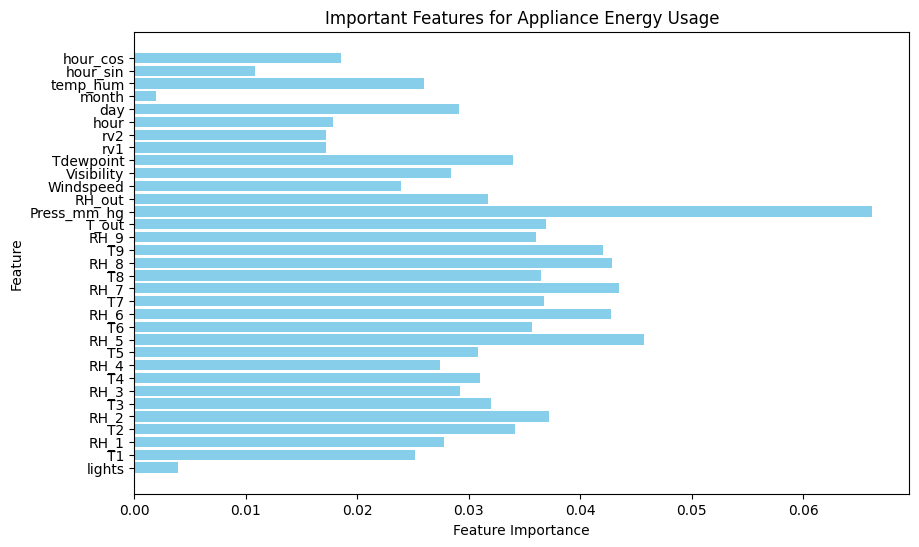

In [24]:
importances = best_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Important Features for Appliance Energy Usage")
plt.show()


In [25]:
# Feature importance

In [26]:
def get_feature_importance(model, feature_names):
    """
    Extracts feature importance from the model and returns a sorted list of features.
    """
    importances = model.feature_importances_
    feature_importance = sorted(zip(importances, feature_names), reverse=True)
    return feature_importance

# Example: After training the best model
feature_names = X_train.columns
feature_importance = get_feature_importance(best_model, feature_names)

# Print the most important features
print("Feature Importance (Top 5):")
for importance, feature in feature_importance[:5]:
    print(f"{feature}: {importance:.4f}")



Feature Importance (Top 5):
Press_mm_hg: 0.0662
RH_5: 0.0457
RH_7: 0.0434
RH_8: 0.0429
RH_6: 0.0427


In [27]:
# Recommendation for energy saving

In [28]:
def recommend_energy_saving(input_data, feature_importance):
    """
    Generates energy-saving recommendations based on feature importance and input data.
    """
    recommendations = []
    
    # Example recommendations based on key features
    if 'T1' in input_data and input_data['T1'] > 24:
        recommendations.append("Consider lowering the thermostat to reduce energy usage.")
    if 'hour' in input_data and 18 <= input_data['hour'] <= 21:
        recommendations.append("Limit appliance use during evening peak hours to save energy.")
    if 'RH_1' in input_data and input_data['RH_1'] > 60:
        recommendations.append("Reduce indoor humidity to improve energy efficiency.")
    if 'lights' in input_data and input_data['lights'] > 0:
        recommendations.append("Turn off lights in unused rooms to save energy.")
    
    if not recommendations:
        recommendations.append("Your energy usage is efficient! Keep up the good work.")
    
    return recommendations


In [29]:
# Example input data (one sample)
input_data = {
    'T1': 26,         # Indoor temperature
    'hour': 19,       # Evening hour
    'RH_1': 65,       # High humidity
    'lights': 1       # Lights on
}

# Get recommendations
tips = recommend_energy_saving(input_data, feature_importance)
print("Energy-Saving Tips:")
for tip in tips:
    print(f"- {tip}")


Energy-Saving Tips:
- Consider lowering the thermostat to reduce energy usage.
- Limit appliance use during evening peak hours to save energy.
- Reduce indoor humidity to improve energy efficiency.
- Turn off lights in unused rooms to save energy.
